In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv('Apple.csv')
df

,Date,Close,Volume,Open,High,Low
0,02-28-2020,273.36,106721200,257.260,278.4100,256.3700
1,02-27-2020,273.52,80151380,281.100,286.0000,272.9600
2,02-26-2020,292.65,49678430,286.530,297.8800,286.5000
3,02-25-2020,288.08,57668360,300.950,302.5300,286.1300
4,02-24-2020,298.18,55548830,297.260,304.1800,289.2300
5,02-21-2020,313.05,32426420,318.620,320.4500,310.5000
6,02-20-2020,320.30,25141490,322.630,324.6500,318.2100
7,02-19-2020,323.62,23495990,320.000,324.5700,320.0000
8,02-18-2020,319.00,38190550,315.360,319.7500,314.6100
9,02-14-2020,324.95,20028450,324.740,325.9800,322.8500


In [69]:
#X & Y data sets as a lists
dates = []
prices = []

In [70]:
#Gets the columns
df_dates = df.loc[:,'Date']
df_open_price = df.loc[:,'Open']

In [71]:
#Fill Dates as data set X
for date in df_dates:
    dates.append( [int(date.split('-')[1])])

#Fill prices as data set Y
for open_price in df_open_price:
    prices.append(float(open_price))


print(dates)
print(prices)

[[28], [27], [26], [25], [24], [21], [20], [19], [18], [14], [13], [12], [11], [10], [7], [6], [5], [4], [3], [31], [30], [29], [28], [27], [24], [23], [22], [21], [17], [16], [15], [14], [13], [10], [9], [8], [7], [6], [3]]
[257.26, 281.1, 286.53, 300.95, 297.26, 318.62, 322.63, 320.0, 315.36, 324.74, 324.19, 321.47, 323.6, 314.18, 322.37, 322.57, 323.52, 315.31, 304.3, 320.93, 320.54400000000004, 324.45, 312.6, 310.06, 320.25, 317.92, 318.58, 317.19, 316.27, 313.59, 311.85, 316.7, 311.64, 310.6, 307.235, 297.16, 299.84, 293.79, 297.15]


In [72]:
def predict_prices(dates,prices,x):

  #SVM Define.
    svr_lin = SVR(kernel='linear' , C=1e3)
    svr_poly = SVR(kernel='poly' , C=1e3 , degree=2)
    svr_rbf = SVR(kernel='rbf' , C=1e3 , gamma=1.0)

    
  #SVM Train.
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)

  #Linear Regression Define and Train.

    lin_reg = LinearRegression()
    lin_reg.fit(dates,prices)
    
    
  #Data Visualization.
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
    plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.show()


    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

In [73]:
dates_train, dates_test, prices_train, prices_test = train_test_split(dates, prices, test_size=0.25, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(dates_train,prices_train)

prices_pred = lin_reg.predict(dates_test)

df = pd.DataFrame({'Actual': prices_test, 'Predicted': prices_pred})
df

,Actual,Predicted
0,297.260,308.628824
1,316.270,310.064863
2,313.590,310.270012
3,310.600,311.500902
4,307.235,311.706051
5,317.920,308.833972
6,324.190,310.885457
7,312.600,307.808230
8,321.470,311.090605
9,317.190,309.244269


In [74]:
dates_train, dates_test, prices_train, prices_test = train_test_split(dates, prices, test_size=0.25, random_state=0)

svr_lin = SVR(kernel='linear', C=1e3)
svr_lin.fit(dates_train, prices_train)

prices_pred = svr_lin.predict(dates_test)

df = pd.DataFrame({'Actual': prices_test, 'Predicted': prices_pred})
df

,Actual,Predicted
0,297.260,318.646667
1,316.270,316.463333
2,313.590,316.151429
3,310.600,314.280000
4,307.235,313.968095
5,317.920,318.334762
6,324.190,315.215714
7,312.600,319.894286
8,321.470,314.903810
9,317.190,317.710952


In [75]:
dates_train, dates_test, prices_train, prices_test = train_test_split(dates, prices, test_size=0.25, random_state=0)

svr_poly = SVR(kernel='poly' , C=1e3 , degree=2)
svr_poly.fit(dates_train, prices_train)

prices_pred = svr_poly.predict(dates_test)

df = pd.DataFrame({'Actual': prices_test, 'Predicted': prices_pred})
df

,Actual,Predicted
0,297.260,317.946807
1,316.270,315.735794
2,313.590,315.481567
3,310.600,314.279762
4,307.235,314.133388
5,317.920,317.584725
6,324.190,314.811329
7,312.600,319.549213
8,321.470,314.618732
9,317.190,316.906784


In [76]:
dates_train, dates_test, prices_train, prices_test = train_test_split(dates, prices, test_size=0.25, random_state=0)

svr_rbf = SVR(kernel='rbf' , C=1e3 , gamma=1.0)
svr_rbf.fit(dates_train,prices_train)

prices_pred = svr_rbf.predict(dates_test)

df = pd.DataFrame({'Actual': prices_test, 'Predicted': prices_pred})
df

,Actual,Predicted
0,297.260,320.149695
1,316.270,311.668330
2,313.590,310.307388
3,310.600,314.280108
4,307.235,305.590873
5,317.920,317.438693
6,324.190,311.739580
7,312.600,257.360395
8,321.470,314.955166
9,317.190,318.519834


In [81]:
df = pd.DataFrame({'Date': dates[7],'Open': prices[7]})
df

,Date,Open
0,19,320.0


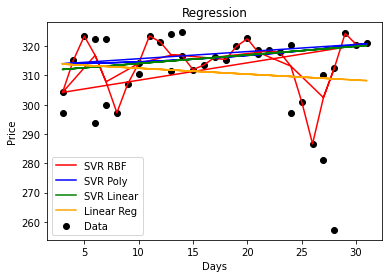

(307.81724759351346, 313.20454545468897, 314.2778422318877, 313.06485434679075)


In [78]:
predicted_price = predict_prices(dates,prices,[[7]])
print(predicted_price)